In [1]:
from itertools import islice
from pathlib import Path
from sys import argv
from textdistance import EntropyNCD

# read files
licenses = dict()
for path in Path('choosealicense.com', '_licenses').iterdir():
    licenses[path.stem] = path.read_text()


In [2]:
distances = []
for name1, content1 in licenses.items():
    for name2, content2 in licenses.items():
        distances.append((name1, name2, EntropyNCD(qval=None)(content1, content2)))

In [3]:
import plotnine as gg
import pandas as pd

In [4]:
df = pd.DataFrame(distances, columns=['name1', 'name2', 'distance'])

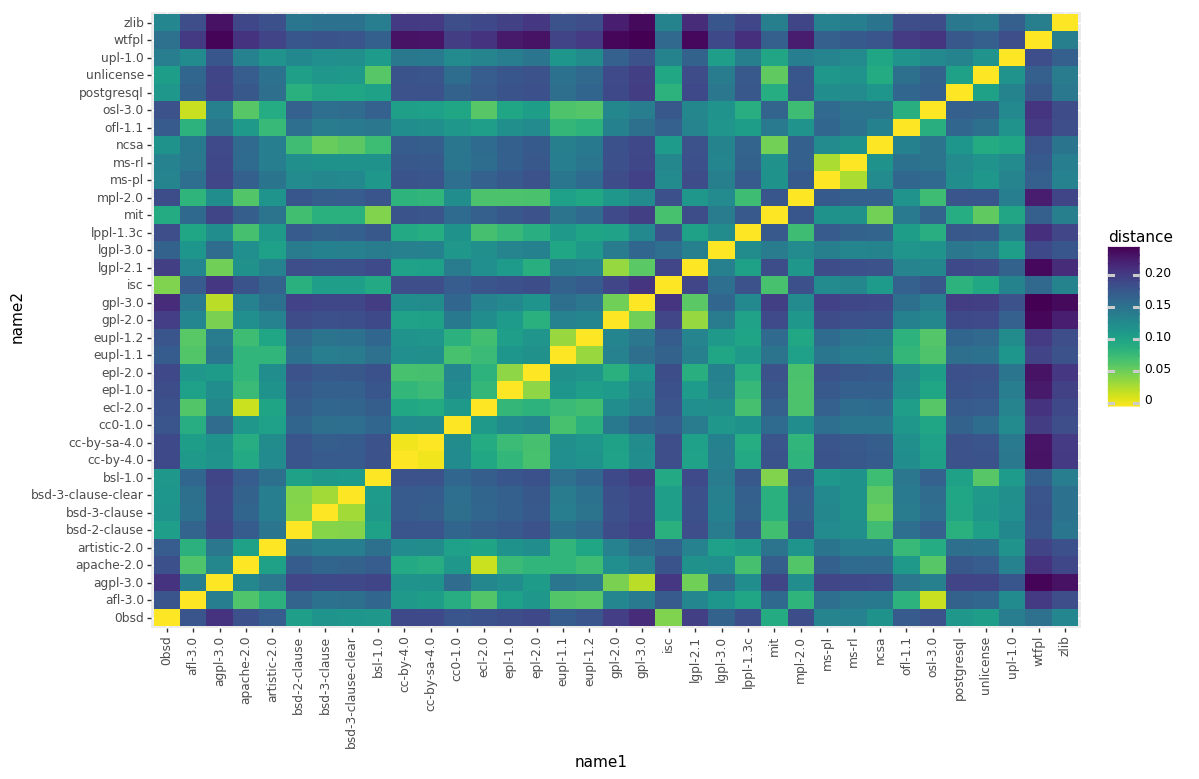

<ggplot: (8787191808597)>

In [6]:
(
    gg.ggplot(df)
    + gg.geom_tile(gg.aes(x='name1', y='name2', fill='distance'))
    + gg.scale_fill_continuous(palette=lambda *args: gg.scale_fill_continuous().palette(*args)[::-1])
    + gg.theme(
        figure_size=(12, 8), 
        axis_text_x=gg.element_text(angle=90),
    )
)